#data understanding
this dataset offers nearly 220000 diamond records with 25 columns of data,providing a rich resource for advanced analytics and model building,such as price prediction and grading quality.it is larger and more comphrehensive compared to many similar datasets on the platform,making it highly suitable for both begnniers and experienced data scientists working on organization models and exploratory data analysis.

cut refers to one of the 10 or so most common diamond cuts. This dataset has an additional one called the 'Cushion Modified'.
Diamond Shapes

color Clear diamonds are graded D-Z. The higher letters more yellowish but are often better values since color is hard to determine once in a ring.

clarity refers the inclusions (i.e., internal flaws) in the diamonds seen though a jewelers loupe or microscope. Fewer and smaller are better.

carat_weight Refers to the mass of the diamond. It's loosely connected with dimension of a diamond but cut and cut_quality tends to play an equally large if not larger role.

cut_quality refers the GIA Cut Grading System which was developed in 2005 and is de facto standard.

lab is the grading lab. The big three are GIA, IGI and HRD. Each diamond gets a lab certificate that looks like this.
polish and symmetry are what you would expect.

eye-clean refers to the blemishes or inclusions can see with a the naked eye. There are 10 grades.

culet_size is the size of the circle you'd see if you looked straight down. None is ideal because it affects the amount of light that gets reflected.

culet_condition indicates if the culet has any chipping, which is why some diamonds don't close to a point but rather a very small flat spot.

fancy_color_ columns have to do with colored diamonds. Formerly, extremely rare but now common, popular, and almost always lab grown.
fluor columns refer to the effect of long wave UV light. According to GIA 25-35% have it; for ~10% of those it's noticeable to an expert.
depth_percentandtable_percent are the relative measurements of the flat part of the top and the depth. This varies somewhat by cut.
meas_length, meas_width, meas_depth are the absolute measurements of stone.

girdle min/max are where the id of a stone is engraved they also are where the meets the setting and play a role in reflection. There are 9 values ranging from extremely thin to extremely thick
fancy columns refer to colored diamonds. They can be natural like the extremely rare blue diamonds, or lab grown. The columns refer to the colors, secondary colors and their intensity.
total_sales_price is priced in dollars.

#Problem statement

This project aims to develop a predictive model using the diamond dataset, which contains 26 features across 200,000 entries, to accurately estimate diamond prices based on these characteristics. By achieving high prediction accuracy, this model can help vendors set fair prices, enhance customer trust, and provide buyers with transparency in the valuation process.


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
df=pd.read_csv('/content/diamonds.csv')
df

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200.0
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200.0
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200.0
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200.0
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32838,32838,Round,E,VVS2,0.23,Excellent,GIA,Excellent,Excellent,unknown,...,2.43,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,842.0
32839,32839,Round,D,VVS2,0.23,Excellent,GIA,Excellent,Excellent,unknown,...,2.43,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,842.0
32840,32840,Round,F,VVS2,0.23,Excellent,GIA,Excellent,Excellent,unknown,...,2.44,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,842.0
32841,32841,Round,E,VVS2,0.23,Excellent,GIA,Excellent,Excellent,unknown,...,2.42,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,842.0


In [ ]:
df.shape

(219703, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

In [ ]:
df.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


#data cleaning

In [ ]:
df.drop_duplicates()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


In [ ]:
df.isnull().sum()  #how many null values.

,0
Unnamed: 0,0
cut,0
color,0
clarity,0
carat_weight,0
cut_quality,0
lab,0
symmetry,0
polish,0
eye_clean,0


In [ ]:
df['fluor_color'].value_counts()

,count
fluor_color,
unknown,203977
Blue,15219
Yellow,400
Green,55
White,42
Orange,10


In [ ]:
df['fancy_color_dominant_color'].value_counts()

,count
fancy_color_dominant_color,
unknown,210539
Yellow,6487
Pink,1369
Brown,531
Green,302
Orange,271
Purple,76
Gray,66
Blue,38


In [ ]:
df['fancy_color_secondary_color'].value_counts()

,count
fancy_color_secondary_color,
unknown,218641
Brown,306
Yellow,239
Orange,155
Pink,126
Green,105
Purple,81
Gray,36
Blue,11


In [ ]:
df['fancy_color_overtone'].value_counts()

,count
fancy_color_overtone,
unknown,217665
Brownish,123
Yellowish,78
Orangey,54
Pinkish,51
Greenish,47
Purplish,34
Grayish,1


In [ ]:
df['fancy_color_intensity'].value_counts()

,count
fancy_color_intensity,
unknown,210541
Fancy,3447
Fancy Intense,1943
Fancy Light,1288
Fancy Deep,777
Fancy Vivid,714
Light,318
Faint,238
Fancy Dark,238


In [ ]:
df['fluor_intensity'].isnull()

,fluor_intensity
0,True
1,True
2,True
3,True
4,True
...,...
219698,True
219699,True
219700,True
219701,False


#

In [ ]:
df=df.drop(columns='fluor_intensity')
df

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,2.87,1.79,M,M,unknown,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,2.89,1.78,STK,STK,unknown,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,2.90,1.77,TN,M,unknown,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,2.88,1.78,M,STK,unknown,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,2.83,1.82,STK,STK,unknown,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,14.18,8.66,M,STK,unknown,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,8.81,5.71,TK,XTK,unknown,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,17.10,10.20,TN,M,unknown,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,4.90,3.47,XTN,VTK,unknown,Red,unknown,unknown,Fancy,1350000


In [ ]:
for column in df.columns:
  print('value counts of',column)
  print(df[column].value_counts)
  print('_'*40)

value counts of Unnamed: 0
<bound method IndexOpsMixin.value_counts of 0              0
1              1
2              2
3              3
4              4
           ...  
219698    219699
219699    219700
219700    219701
219701    219702
219702    219703
Name: Unnamed: 0, Length: 219703, dtype: int64>
________________________________________
value counts of cut
<bound method IndexOpsMixin.value_counts of 0            Round
1            Round
2            Round
3            Round
4            Round
            ...   
219698       Round
219699     Radiant
219700       Round
219701    Princess
219702        Pear
Name: cut, Length: 219703, dtype: object>
________________________________________
value counts of color
<bound method IndexOpsMixin.value_counts of 0               E
1               E
2               E
3               E
4               E
           ...   
219698          E
219699    unknown
219700          E
219701    unknown
219702    unknown
Name: color, Length: 219703, dtyp

In [ ]:
df=df.drop(columns='fancy_color_intensity')
df

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,2.85,2.87,1.79,M,M,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,2.84,2.89,1.78,STK,STK,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,2.88,2.90,1.77,TN,M,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,2.86,2.88,1.78,M,STK,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,2.79,2.83,1.82,STK,STK,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,14.06,14.18,8.66,M,STK,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,11.55,8.81,5.71,TK,XTK,unknown,Green,unknown,NaN,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,17.06,17.10,10.20,TN,M,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,5.22,4.90,3.47,XTN,VTK,unknown,Red,unknown,unknown,1350000


In [ ]:
df=df.drop(columns='fancy_color_overtone')
df

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,59.0,2.85,2.87,1.79,M,M,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,59.0,2.84,2.89,1.78,STK,STK,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,59.0,2.88,2.90,1.77,TN,M,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,59.0,2.86,2.88,1.78,M,STK,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,58.5,2.79,2.83,1.82,STK,STK,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,58.0,14.06,14.18,8.66,M,STK,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,65.0,11.55,8.81,5.71,TK,XTK,unknown,Green,unknown,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,59.0,17.06,17.10,10.20,TN,M,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,72.0,5.22,4.90,3.47,XTN,VTK,unknown,Red,unknown,1350000


In [ ]:
df=df.drop(columns='Unnamed: 0')
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,59.0,2.85,2.87,1.79,M,M,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,59.0,2.84,2.89,1.78,STK,STK,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,59.0,2.88,2.90,1.77,TN,M,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,59.0,2.86,2.88,1.78,M,STK,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,58.5,2.79,2.83,1.82,STK,STK,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,...,58.0,14.06,14.18,8.66,M,STK,unknown,unknown,unknown,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,...,65.0,11.55,8.81,5.71,TK,XTK,unknown,Green,unknown,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,...,59.0,17.06,17.10,10.20,TN,M,unknown,unknown,unknown,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,N,...,72.0,5.22,4.90,3.47,XTN,VTK,unknown,Red,unknown,1350000


In [ ]:
df['eye_clean'].value_counts()

,count
eye_clean,
unknown,156916
Yes,61931
Borderline,515
E1,300
No,41


In [ ]:
df=df.drop(columns='eye_clean')
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,culet_condition,...,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,unknown,...,59.0,2.85,2.87,1.79,M,M,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,unknown,...,59.0,2.84,2.89,1.78,STK,STK,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,59.0,2.88,2.90,1.77,TN,M,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,59.0,2.86,2.88,1.78,M,STK,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,unknown,...,58.5,2.79,2.83,1.82,STK,STK,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,unknown,...,58.0,14.06,14.18,8.66,M,STK,unknown,unknown,unknown,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,...,65.0,11.55,8.81,5.71,TK,XTK,unknown,Green,unknown,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,unknown,...,59.0,17.06,17.10,10.20,TN,M,unknown,unknown,unknown,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,N,unknown,...,72.0,5.22,4.90,3.47,XTN,VTK,unknown,Red,unknown,1350000


In [ ]:
df=df.drop(columns='culet_condition')
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,M,STK,unknown,unknown,unknown,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,unknown,Green,unknown,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,TN,M,unknown,unknown,unknown,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,XTN,VTK,unknown,Red,unknown,1350000


In [ ]:
df=df.drop(columns='fluor_color')
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fancy_color_dominant_color,fancy_color_secondary_color,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,M,STK,unknown,unknown,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,Green,unknown,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,TN,M,unknown,unknown,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,XTN,VTK,Red,unknown,1350000


In [ ]:
df=df.drop(columns='fancy_color_secondary_color')
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fancy_color_dominant_color,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,M,STK,unknown,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,Green,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,TN,M,unknown,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,XTN,VTK,Red,1350000


In [ ]:
df=df.drop(columns='fancy_color_dominant_color')
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


#correlation

In [ ]:
df['culet_size'].replace(['unknown'],'NaN',inplace=True)
df

<ipython-input-24-4cbd28fb3d4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['culet_size'].replace(['unknown'],'NaN',inplace=True)


,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,NaN,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,NaN,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,NaN,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


#descriptive statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cut                219703 non-null  object 
 1   color              219703 non-null  object 
 2   clarity            219703 non-null  object 
 3   carat_weight       219703 non-null  float64
 4   cut_quality        219703 non-null  object 
 5   lab                219703 non-null  object 
 6   symmetry           219703 non-null  object 
 7   polish             219703 non-null  object 
 8   culet_size         219703 non-null  object 
 9   depth_percent      219703 non-null  float64
 10  table_percent      219703 non-null  float64
 11  meas_length        219703 non-null  float64
 12  meas_width         219703 non-null  float64
 13  meas_depth         219703 non-null  float64
 14  girdle_min         219703 non-null  object 
 15  girdle_max         219703 non-null  object 
 16  to

In [ ]:
df['cut'].unique()  #to find the unique values

array(['Round', 'Pear', 'Oval', 'Marquise', 'Princess', 'Emerald',
       'Heart', 'Cushion', 'Radiant', 'Cushion Modified', 'Asscher'],
      dtype=object)

In [ ]:
#converting all string to numerical values
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['cut']=labelencoder.fit_transform(df['cut'])
df['color']=labelencoder.fit_transform(df['color'])                   #to convert the values to numerical values
df['clarity']=labelencoder.fit_transform(df['clarity'])
df['cut_quality']=labelencoder.fit_transform(df['cut_quality'])
df['lab']=labelencoder.fit_transform(df['lab'])
df['symmetry']=labelencoder.fit_transform(df['symmetry'])
df['polish']=labelencoder.fit_transform(df['polish'])
df['culet_size']=labelencoder.fit_transform(df['culet_size'])
df['girdle_min']=labelencoder.fit_transform(df['girdle_min'])
df['girdle_max']=labelencoder.fit_transform(df['girdle_max'])
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,10,1,10,0.09,0,2,4,4,3,62.7,59.0,2.85,2.87,1.79,0,0,200
1,10,1,10,0.09,4,2,4,4,3,61.9,59.0,2.84,2.89,1.78,1,1,200
2,10,1,10,0.09,0,2,4,4,4,61.1,59.0,2.88,2.90,1.77,4,0,200
3,10,1,10,0.09,0,2,4,4,4,62.0,59.0,2.86,2.88,1.78,0,1,200
4,10,1,10,0.09,4,2,4,0,3,64.9,58.5,2.79,2.83,1.82,1,1,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,10,1,7,10.65,0,0,0,0,3,61.3,58.0,14.06,14.18,8.66,0,1,1210692
219699,9,10,8,5.17,5,0,4,4,4,64.8,65.0,11.55,8.81,5.71,3,7,1292500
219700,10,1,7,18.07,0,0,0,0,3,60.2,59.0,17.06,17.10,10.20,4,0,1315496
219701,8,10,5,0.90,5,0,2,2,3,70.8,72.0,5.22,4.90,3.47,8,5,1350000


#correlation analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
correlation_matrix=df.corr()
correlation_matrix

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
cut,1.000000,-0.151222,0.011213,-0.233341,-0.684046,0.065103,-0.390334,-0.192917,-0.022928,-0.127451,-0.157866,-0.340470,-0.026820,-0.049159,-0.121008,-0.213296,-0.107148
color,-0.151222,1.000000,-0.052218,0.202384,0.131940,0.109374,0.042829,0.062780,0.015476,0.023350,-0.019711,0.186921,0.186233,0.084349,0.054824,0.078942,0.060034
clarity,0.011213,-0.052218,1.000000,-0.082284,-0.048219,0.002290,-0.038009,-0.061063,-0.014184,0.030218,0.012728,-0.126235,-0.113816,-0.041535,-0.040239,-0.044085,-0.007052
carat_weight,-0.233341,0.202384,-0.082284,1.000000,0.199534,0.070986,0.037661,0.002669,-0.004225,0.061724,0.090697,0.782683,0.788912,0.350719,0.011359,0.032708,0.745963
cut_quality,-0.684046,0.131940,-0.048219,0.199534,1.000000,-0.051488,0.622944,0.320014,0.057311,0.128157,0.164652,0.331377,0.010282,0.048847,0.166511,0.276599,0.077889
lab,0.065103,0.109374,0.002290,0.070986,-0.051488,1.000000,-0.002012,0.036027,0.197906,-0.225310,-0.107094,0.029830,0.060569,0.032218,0.089044,0.094551,0.009814
symmetry,-0.390334,0.042829,-0.038009,0.037661,0.622944,-0.002012,1.000000,0.367896,0.065887,0.059054,0.071771,0.127476,-0.070909,-0.009535,0.118515,0.185010,-0.008895
polish,-0.192917,0.062780,-0.061063,0.002669,0.320014,0.036027,0.367896,1.000000,0.082310,-0.014940,0.011552,0.038587,-0.077771,-0.013053,0.067363,0.091552,-0.003066
culet_size,-0.022928,0.015476,-0.014184,-0.004225,0.057311,0.197906,0.065887,0.082310,1.000000,-0.126343,-0.133297,-0.003771,-0.032267,-0.016173,0.470529,0.452314,-0.001624
depth_percent,-0.127451,0.023350,0.030218,0.061724,0.128157,-0.225310,0.059054,-0.014940,-0.126343,1.000000,0.673835,0.128791,0.119692,0.086477,-0.121926,-0.104398,0.025408


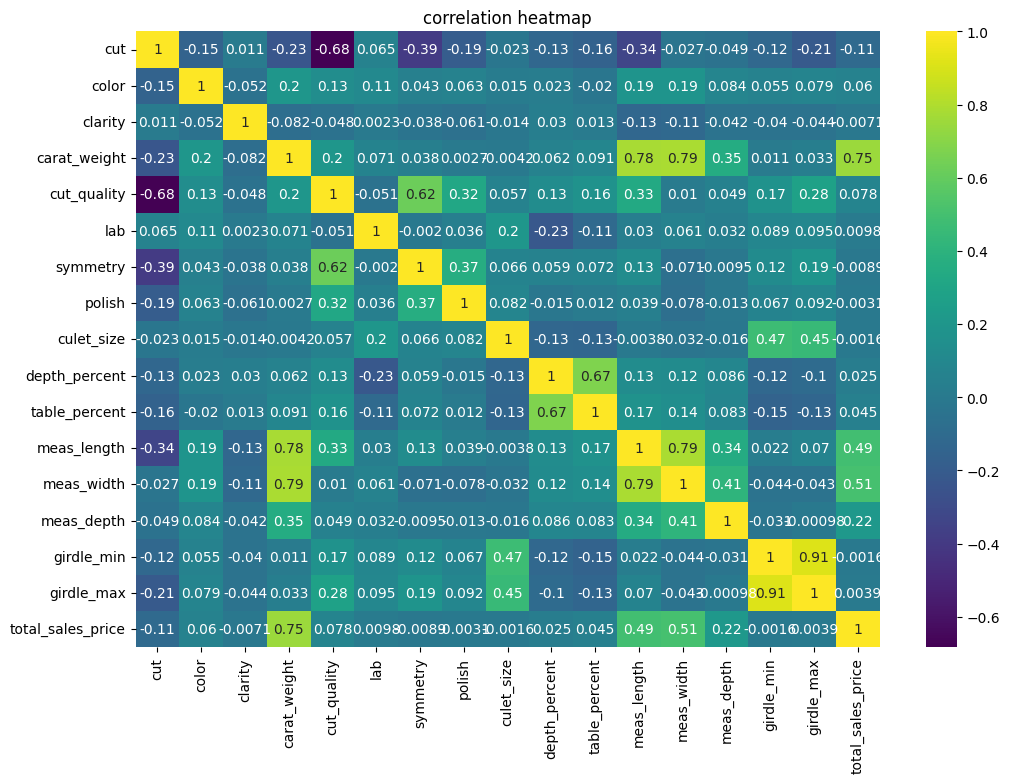

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='viridis')
plt.title('correlation heatmap')
plt.show()

In [ ]:
df.duplicated().sum()

4099

In [ ]:
print(df['culet_size'].value_counts())

culet_size
3    131899
4     85740
8      1345
5       476
2       163
1        58
6        14
0         4
7         4
Name: count, dtype: int64


In [ ]:
print=df['culet_size'].unique()

#visulization

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


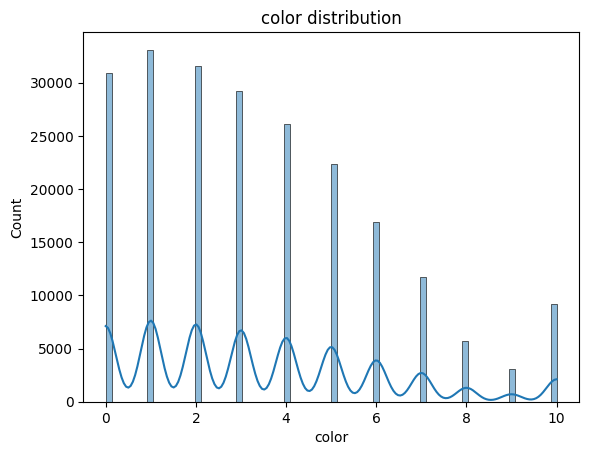

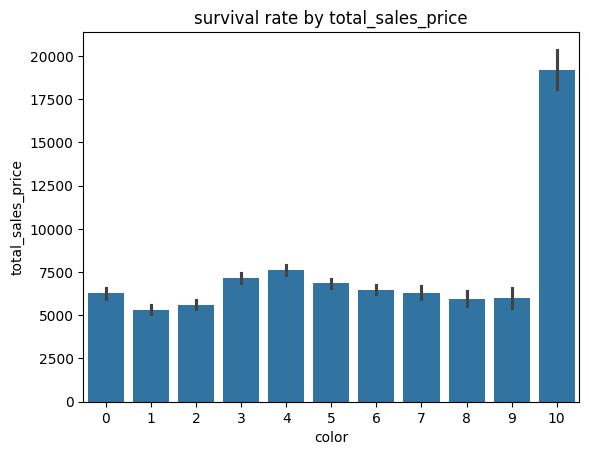

In [ ]:
sns.histplot(df['color'],kde=True)
plt.title('color distribution')
plt.show()

#bivariate analysis:survival rate by 'sex'
sns.barplot(x='color',y='total_sales_price',data=df)
plt.title('survival rate by total_sales_price')
plt.show()

#multivariate analysis:pair plot of numerical features
#sns.pairplot(df[['age','fare','survived']],hue='survived')
#plt.show()

#outlier detection

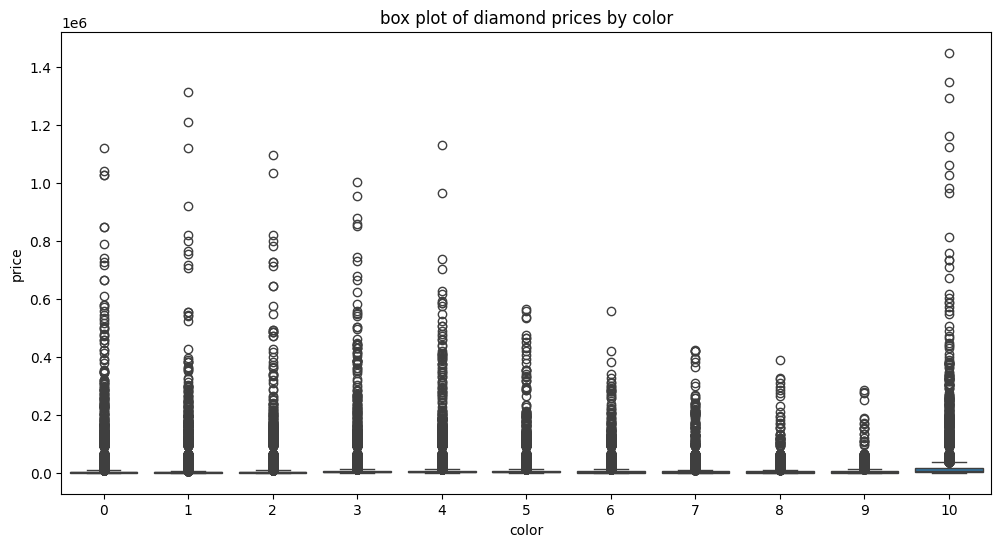

In [ ]:
#bos plot for price vs.color
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='color',y='total_sales_price')
plt.title('box plot of diamond prices by color')
plt.xlabel('color')
plt.ylabel('price')
plt.show()

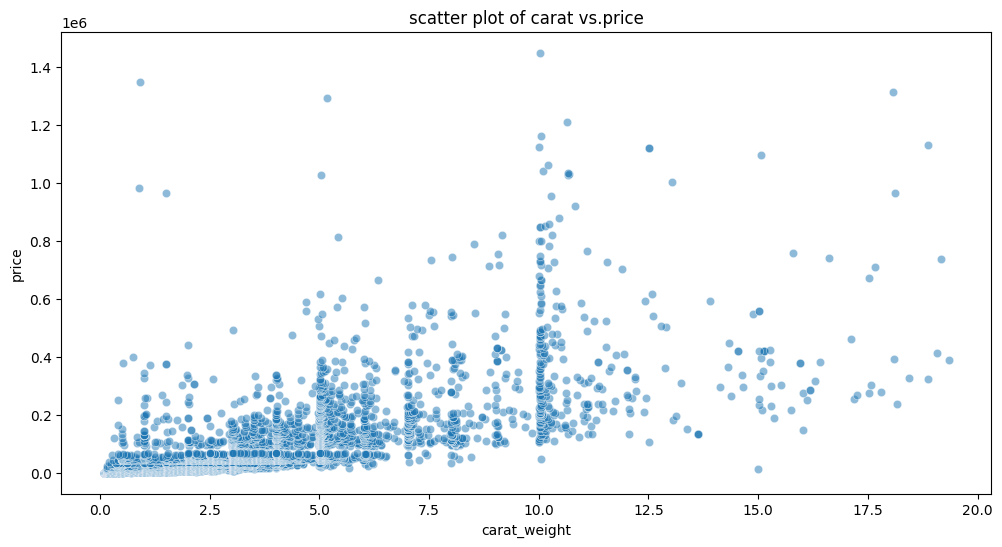

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='carat_weight',y='total_sales_price',alpha=0.5)
plt.title('scatter plot of carat vs.price')
plt.xlabel('carat_weight')
plt.ylabel('price')
plt.show()

#feature engineering


In [ ]:
#In feature enginering there is nothing to change in the dataset like rename or add new columns.
#join girdle_min and gridel_max.
df['gd_min_max']=df['girdle_min'] + df['girdle_max'] +1
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price,gd_min_max
0,10,1,10,0.09,0,2,4,4,3,62.7,59.0,2.85,2.87,1.79,0,0,200,1
1,10,1,10,0.09,4,2,4,4,3,61.9,59.0,2.84,2.89,1.78,1,1,200,3
2,10,1,10,0.09,0,2,4,4,4,61.1,59.0,2.88,2.90,1.77,4,0,200,5
3,10,1,10,0.09,0,2,4,4,4,62.0,59.0,2.86,2.88,1.78,0,1,200,2
4,10,1,10,0.09,4,2,4,0,3,64.9,58.5,2.79,2.83,1.82,1,1,200,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,10,1,7,10.65,0,0,0,0,3,61.3,58.0,14.06,14.18,8.66,0,1,1210692,2
219699,9,10,8,5.17,5,0,4,4,4,64.8,65.0,11.55,8.81,5.71,3,7,1292500,11
219700,10,1,7,18.07,0,0,0,0,3,60.2,59.0,17.06,17.10,10.20,4,0,1315496,5
219701,8,10,5,0.90,5,0,2,2,3,70.8,72.0,5.22,4.90,3.47,8,5,1350000,14






#Dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ['cut',	'color',	'clarity',	'carat_weight',	'cut_quality','symmetry',	'polish',	'culet_size',	'depth_percent',	'table_percent',	'meas_length',	'meas_width',	'meas_depth','total_sales_price',	'girdle_min','girdle_max'	]
X = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='total_sales_price', data=df)
plt.title('PCA of diamond Data')
plt.show()
#X = StandardScaler().fit_transform(df[features])


ValueError: could not convert string to float: 'Round'

#data scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[['depth_percent','table_percent','total_sales_price','gd_min_max']])


#initial modeling

In [ ]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Importing the train_test_split function from sklearn.model_selection

In [ ]:
# Regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [ ]:
X = df.drop(["total_sales_price"],axis=1)
y = df['total_sales_price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    # "Decision Tree": DecisionTreeRegressor(),
    # "Random Forest": RandomForestRegressor(),
    # "Gradient Boosting": GradientBoostingRegressor(),


}

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2


In [ ]:
# Dictionary to store the results
results = {}


In [ ]:
for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train) #This line fits the model before predicting

    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    mae, rmse, r2 = evaluate_model(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

In [ ]:
results_df = pd.DataFrame(results).T
results_df

,MAE,RMSE,R²
Linear Regression,6.642331e-11,8.973287e-11,1.0
